# Øving 4
## Oppgave 1

Kula i et flipperspill skytes ut fra en fjærbelastet avtrekker. Spilleren trekker i fjæra slik at den presses sammen en avstand $x=7,0 \textrm{ cm}$. Flipperspillet har en helningsvinkel $\theta=15^{\circ}$. Se figuren under.

<center><img src="figurer/pinball_fjær.png" alt="" style="width: 400px;"/></center>

Hvor stor må fjærkonstanten $k$ til fjæra være dersom kula akkurat skal nå toppen av flipperspillet, som ligger en avstand $s=78 \textrm{ cm}$ fra punktet der kula forlater fjæra (i punktet der fjæra er slapp).



## Oppgave 2
En vogn i en berg-og-dalbane starter i en viss høyde $h$ over det laveste punktet A i en sirkulær loop med radius $R$. To andre punkter i loopen er markerte: B er midtveis oppe, og C er det høyeste punktet. Se figuren under.

<center><img src="figurer/oppgave_sirkelbevegelse_vogn_loop.png" alt="" style="width: 400px;"/></center>

I denne oppgaven skal vi se bort fra friksjon og luftmotstand.

a) Fra hvilken høyde $h$ over punkt A må vogna slippes for at den skal kunne fullføre en hel loop uten å miste kontakten med underlaget?

b) Hva er normalkrafta på vogna i det høyeste punktet i loopen dersom den slippes fra en starthøyde $h=3R$?


Oppgave x
Bevegelsesmengde?

## Oppgave 3
To fallskjermhoppere A og B med identiske masser $m=70 \textrm{ kg}$ faller vertikalt fra samme starthøyde. A faller med hodet først og har frontareal $A=0,17 \textrm{ m}^2$ og "drag-koeffisient" $C_d=0,70$; B faller liggende og har $A=1,0 \textrm{ m}^2$ og $C_d=1,0$.

a) Finn ved regning terminalhastighetene for A og B.

De to siste oppgavene skal besvares ved å løse bevegelseslikningene numerisk. Ta gjerne utgangspunkt i rutinene til slutt i dokumentet.

b) Hvor lang tid tar det før hopperne har nådd 98 % av sine terminalhastigheter?

c) Hvor langt har de falt (målt fra startpunktet) idet de når 98 % av terminalhastigheten sin?

In [5]:
#Rutiner for simulering av vertikalt fall med luftmotstand

import numpy as np
import matplotlib.pyplot as plt

# Globale konstanter
m=70 #Legemets masse i kg
g=9.81 #Tyngdeakselerasjonen i m/s^2

def drag(A,C,v):
    "Funksjonen drag beregner luftmotstanden f=kv^2, der k = 0.5*rho*C*A"
    rho=1.28 # Massetetthet luft i kg/m**3 
    k=0.5*rho*A*C #Koeffisienten k i f=kv^2
    return k*v**2

def dXdt(X):
   """Funksjonen dXdt beregner høyresiden f(X) i differensiallikningssystemet; dX/dt=f(X).
   Input:
   X:  X=[y,v] en vektor som inneholder posisjon y og (vertikal) fart v. Med positiv retning nedover er v > 0 og y < 0 
   for et legeme som faller vertikalt mot bakken.
   
   Output:
   [dydt,dvdt]: Array med nye verdier for hastighet (dydt) og akselerasjon (dvdt)
   """
   y , v =X        #Koordinater y og v hentes fra inndatavektor X
   f=drag(A,C,v)   #Luftmotstand i N
   dydt=v          #Sammenhengen mellom 
   dvdt=-f/m+g     #Akselerasjonen, fra Newtons 2. lov
   return np.array([dydt,dvdt])

def euler(t0,y0,v0,dt):
    """Funksjon som bruker Eulers metode til å løse et system av differensiallikninger dX/dt = f(X), der X =[y,v] er
    en vektor som inneholder posisjons- og hastighetsvariable. 
    Input: 
    t0: Starttid [s]
    y0: Startverdi for y [m]
    v0: Vertikal startfart [m/s]
    dt: Tidssteg [s]

    Output:
    t_liste: array med t-verdier,[t0,...tn]
    y_liste: array med y-verdier, [y0,...,yn]
    v_liste: array med v-verdier, [v0,...,vn]
    """

    X0=np.array([y0,v0]) #X0 er en vektor med posisjon og fart ved t=t0
    t_liste=[0.0]# Liste med t-verdier
    y_liste=[y0]# liste med y-verdier
    v_liste=[v0] # liste med v-verdier
    X=X0  # initierer loop
    t=t0
    y=y0
    while y<=0: #Loop kjøres inntil legemet treffer bakken; med pos. retning nedover er y0 < 0
        Xn=X+dt*dXdt(X) #Beregner neste steg i Euler-metoden
        y=Xn[0]
        v=Xn[1] # henter elementene
        t_liste.append(t) # t-verdi legges til liste
        y_liste.append(y)# y-verdi legges til liste
        v_liste.append(v)# v-verdi legges til liste
        t=t+dt
        X=Xn
    return t_liste,y_liste,v_liste

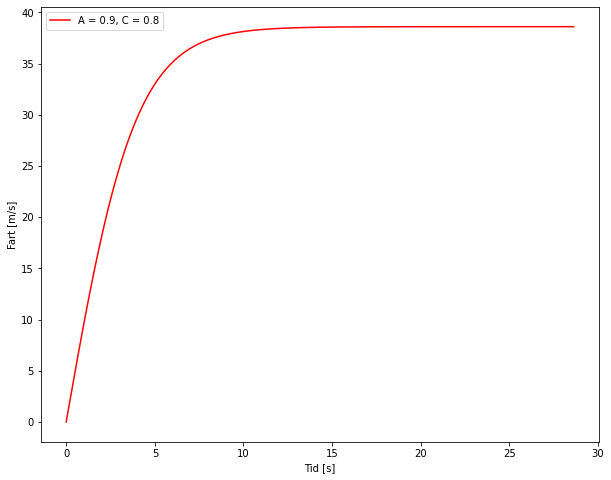

In [6]:
#Eksempel på bruk av rutinene
t0=0.0
v0=0
y0=-1000 #NB! Med positiv retning nedover, er y-verdier negative over bakken. Her starter fallet 1,0 km over bakken.
dt=0.01
A=0.9
C=0.8
t_liste,y_liste,v_liste=euler(t0,y0,v0,dt)
plt.figure(figsize = (10, 8))
plt.plot(t_liste,v_liste,color="red",label='A = '+str(A)+", C = "+str(C))
plt.xlabel("Tid [s]")
plt.ylabel("Fart [m/s]")
plt.legend()
plt.show()